In [ ]:
# Nomes dos arquivos gravados
audio2 = 'RA11201721752.wav'
audio3 = 'Burrinho_LucasTuranoMachado.wav'
audio4 = 'Camoes_LucasTuranoMachado.wav'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")

In [ ]:
print(audio2)
v2, sr2 = librosa.load(audio2)
IPython.display.Audio(data=v2, rate=sr2)

RA11201721752.wav


In [ ]:
print(audio3)
v3, sr3 = librosa.load(audio3)
IPython.display.Audio(data=v3, rate=sr3)

Burrinho_LucasTuranoMachado.wav


In [ ]:
print(audio4)
v4, sr4 = librosa.load(audio4)
IPython.display.Audio(data=v4, rate=sr4)

Camoes_LucasTuranoMachado.wav


In [ ]:
#OBS.: insira nome do arquivo WAV
audio1 = 'Entre_Leva_Catia_Falada (1).wav'
print(audio1)
v1 , sr1 = librosa.load(audio1)
print(type(v1), type(sr1))
print(v1.shape, sr1)
# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=v1, rate=sr1)

Entre_Leva_Catia_Falada (1).wav
<class 'numpy.ndarray'> <class 'int'>
(292805,) 22050


Text(0.5, 1.0, 'Voz da CatiaEntre_Leva_Catia_Falada (1).wav')

<Figure size 432x288 with 0 Axes>

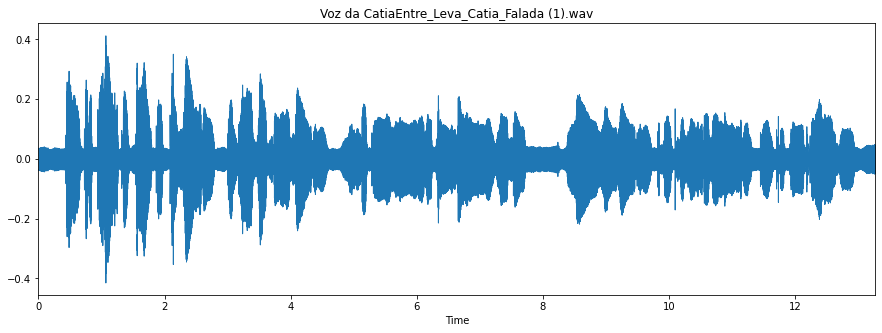

In [ ]:

plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveplot(v1, sr=sr1)
plt.title('Voz da Catia' + audio1)

In [ ]:
print('Frequência de Amostragem', sr1)

Frequência de Amostragem 22050


In [ ]:
fa = sr1
print(fa)

22050


In [ ]:
Ts = 0.04   # Tempo de duração do segmento em segundos
Nj = int(Ts*fa) # Número de pontos da Janela
print('Tamanho do Segmento', Nj)

Tamanho do Segmento 882


In [ ]:
Nseg = int(len(v1)/Nj)
Nover = int(Nj*0.5)
print('Número de Segmentos no Arquivo', Nseg, '. Pontos Soprepostos', Nover )

Número de Segmentos no Arquivo 331 . Pontos Soprepostos 441


Text(0.5, 1.0, 'Janela de Hamming')

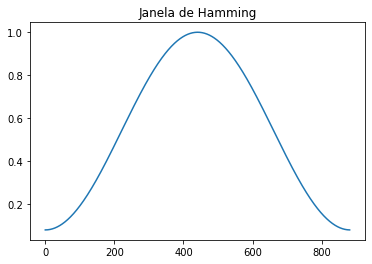

In [ ]:
from scipy import signal
hm = signal.get_window('hamming', Nj)
plt.plot(hm); plt.title('Janela de Hamming')

Text(0.5, 0, 'Segmento')

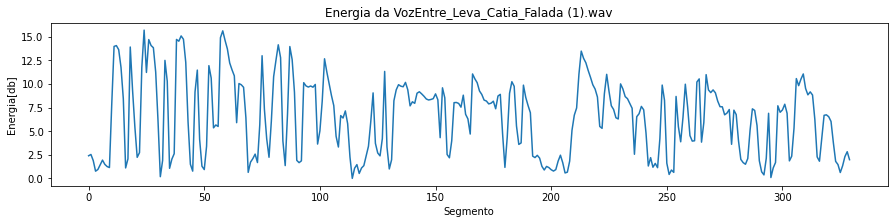

In [ ]:
Nover = int(Nj*0.5)
Nseg = int(len(v1)/Nj)
E = []
for l in range(1, Nseg):
    xjan = v1[(l-1)*Nj+Nover:l*Nj+Nover]*hm
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj
    E.append(aux)
E = 10*np.log10(E)
Emin = np.min(E)  # calcula nível de ruído de fundo
plt.figure
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(E - Emin)
plt.title('Energia da Voz' + audio1)
plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

In [ ]:
# Definindo função para realizar todo o processamento
def contorno_energia(audio_nome):
    v1, sr1 = librosa.load(audio_nome)
    fa = sr1
    Ts = 0.04   # Tempo de duração do segmento em segundos
    Nj = int(Ts*fa) # Número de pontos da Janela
    Nseg = int(len(v1)/Nj)
    Nover = int(Nj*0.5)
    hm = signal.get_window('hamming', Nj)
    Nover = int(Nj*0.5)
    Nseg = int(len(v1)/Nj)
    E = []
    for l in range(1, Nseg):
        xjan = v1[(l-1)*Nj+Nover:l*Nj+Nover]*hm
        x2 = list(np.array(xjan**2))
        aux = sum(x2)/Nj
        E.append(aux)
    E = 10*np.log10(E)
    Emin = np.min(E)  # calcula nível de ruído de fundo
    plt.figure
    fig, ax = plt.subplots(figsize=(15, 3))
    plt.plot(E - Emin)
    plt.title('Energia da Voz ' + audio_nome)
    plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

    plt.savefig('1_' + audio_nome[:2] + ".png", bbox_inches='tight')

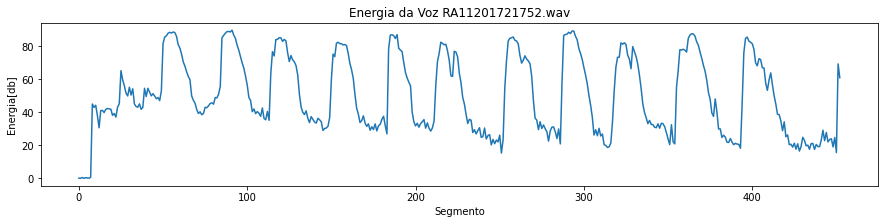

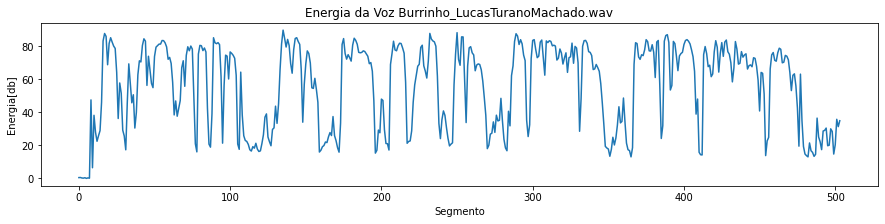

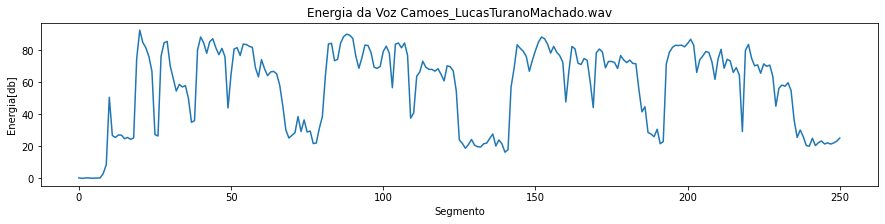

In [ ]:
contorno_energia(audio2)
contorno_energia(audio3)
contorno_energia(audio4)

Text(0.5, 1.0, 'Potência e Espectrograma Linear na FrequênciaEntre_Leva_Catia_Falada (1).wav')

<Figure size 864x576 with 0 Axes>

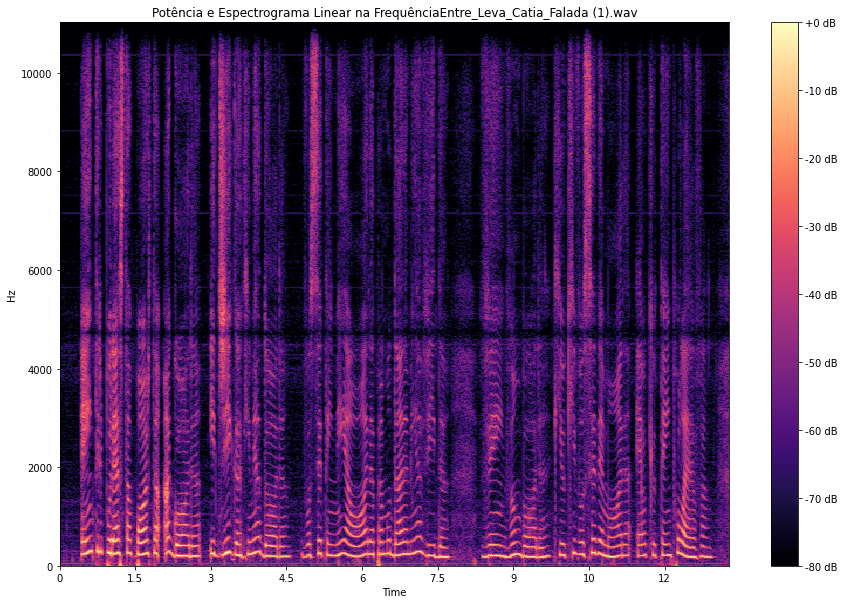

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v1)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência'+ audio1)

In [ ]:
# Definindo função para realizar todo o processamento
def espectrograma(audio_nome):
    v1, sr1 = librosa.load(audio_nome)
    plt.figure(figsize=(12, 8))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(v1)), ref=np.max)
    fig, ax = plt.subplots(figsize=(15, 10))
    librosa.display.specshow(D, x_axis='time',y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Potência e Espectrograma Linear na Frequência'+ audio_nome)

    plt.savefig('2_' + audio_nome[:2] + ".png", bbox_inches='tight')

<Figure size 864x576 with 0 Axes>

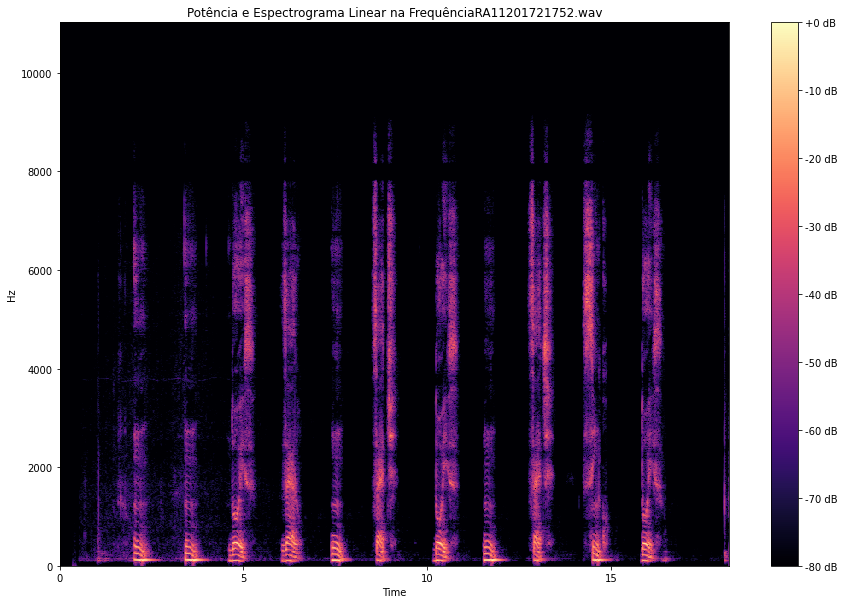

<Figure size 864x576 with 0 Axes>

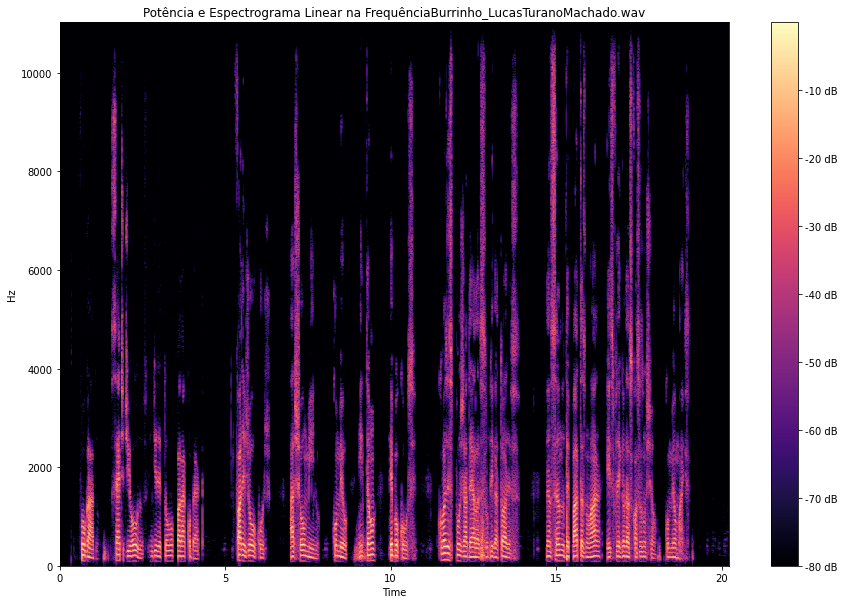

<Figure size 864x576 with 0 Axes>

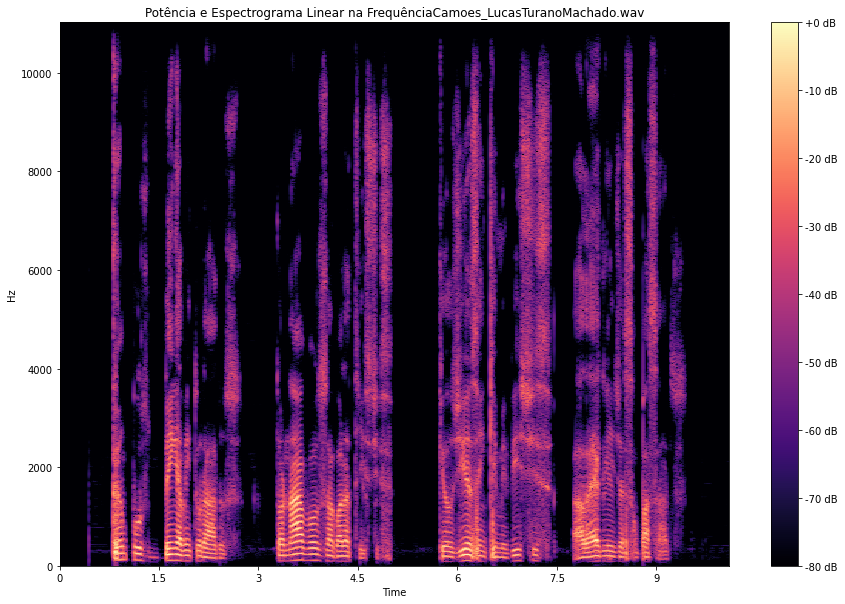

In [ ]:
espectrograma(audio2)
espectrograma(audio3)
espectrograma(audio4)

In [ ]:
# Segmente um fonema que tenha Pitch, p.ex "En" de "Entre"
v1En = v1[4000:16000]
IPython.display.Audio(data=v1En, rate=sr1)

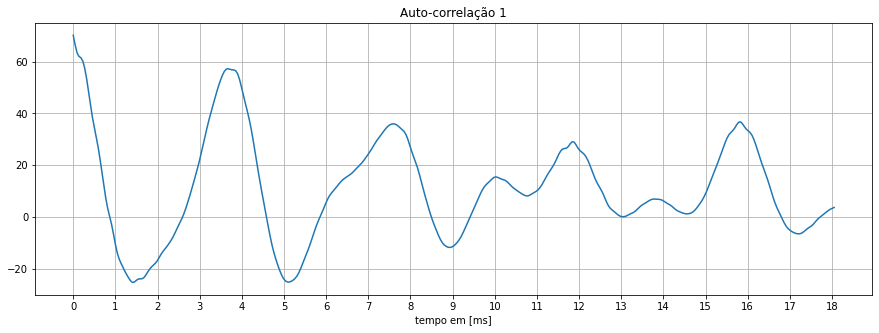

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
acEn = librosa.autocorrelate(v1En, max_size= sr1/32)
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(1))
y1 = acEn[1:400]
x1 = range(len(y1))
xx = [i*1000/sr1 for i in x1]
plt.grid(True)
ax.plot(xx,y1)

plt.title('Auto-correlação 1')
plt.xlabel('tempo em [ms]')
plt.show()

In [ ]:
# Segmente outro fonema que tenha Pitch, p.ex "Ag" de "Agora"
v1A = v1[48000:56000]
IPython.display.Audio(data=v1A, rate=sr1)

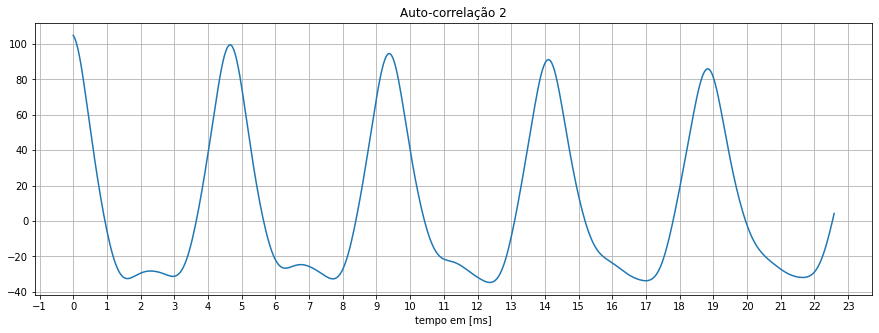

In [ ]:
acA = librosa.autocorrelate(v1A, max_size= sr1/32)
fig, ax2 = plt.subplots(figsize=(15, 5))
ax2.xaxis.set_major_locator(MultipleLocator(1))
y2 = acA[1:500]
x2 = range(len(y2))
xx2 = [i*1000/sr1 for i in x2]
plt.grid(True)
ax2.plot(xx2,y2)

plt.title('Auto-correlação 2')
plt.xlabel('tempo em [ms]')
plt.show()

In [ ]:
def auto_correlacao(ini, fim, audio_nome, fonema_nome):
    v1, sr1 = librosa.load(audio_nome)
    v1A = v1[ini:fim]
    acA = librosa.autocorrelate(v1A, max_size= sr1/32)
    fig, ax2 = plt.subplots(figsize=(15, 5))
    ax2.xaxis.set_major_locator(MultipleLocator(1))
    y2 = acA[1:500]
    x2 = range(len(y2))
    xx2 = [i*1000/sr1 for i in x2]
    plt.grid(True)
    ax2.plot(xx2,y2)

    plt.title('Auto-correlacao '+audio_nome+' '+fonema_nome)
    plt.xlabel('tempo em [ms]')
    
    plt.savefig('3_'+audio_nome[:2] + '.png', bbox_inches='tight')
    
    plt.show()

In [ ]:
def plot_audio(audio_nome):
    v1, sr1 = librosa.load(audio_nome)
    plt.figure()
    fig, ax = plt.subplots(figsize=(15, 5))
    librosa.display.waveplot(v1, sr=sr1)
    plt.title(audio_nome)

<Figure size 432x288 with 0 Axes>

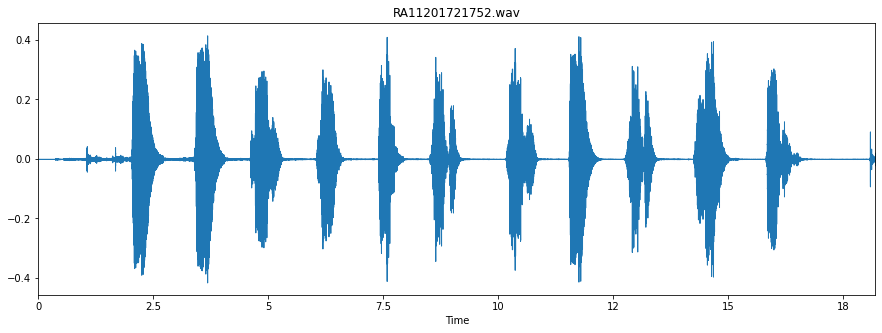

In [ ]:

plot_audio(audio2)

In [ ]:
# "Do" do número "Dois"
ini = 90000
fim = 106000
v2, sr2 = librosa.load(audio2)
v2A = v2[ini:fim]
IPython.display.Audio(data=v2A, rate=sr2)

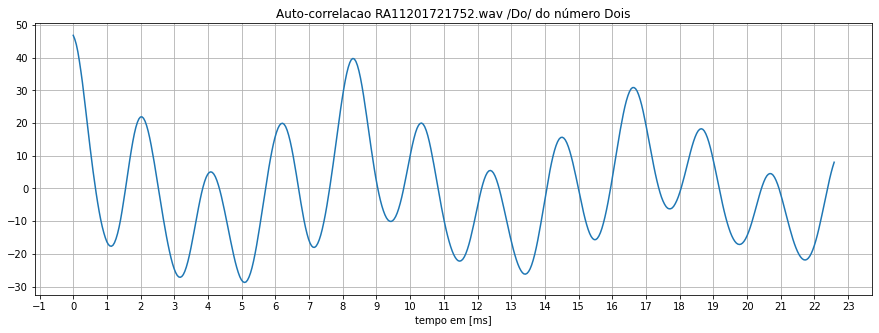

In [ ]:
# "Do" do número "Dois"
auto_correlacao(ini, fim, audio2, "/Do/ do número Dois")

<Figure size 432x288 with 0 Axes>

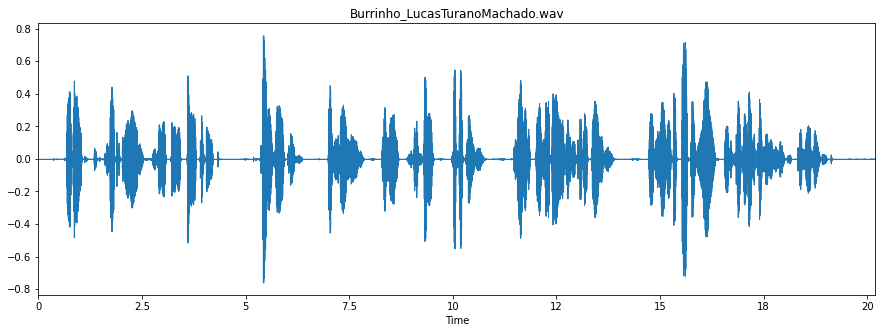

In [ ]:

plot_audio(audio3)

In [ ]:
# "ga" da palavra "folgado"
ini = 17000
fim = 21000
v3, sr3 = librosa.load(audio3)
v3A = v3[ini:fim]
IPython.display.Audio(data=v3A, rate=sr3)

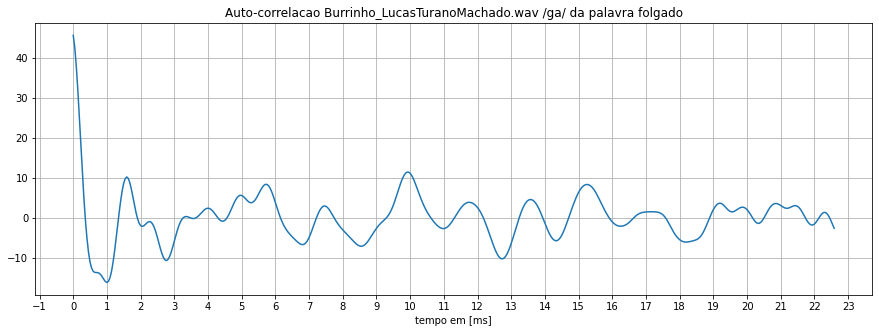

In [ ]:
# "ga" da palavra "folgado"
auto_correlacao(ini, fim, audio3, "/ga/ da palavra folgado")

<Figure size 432x288 with 0 Axes>

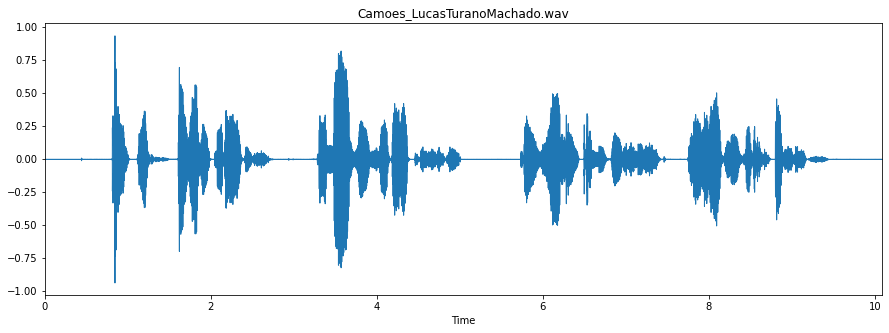

In [ ]:

plot_audio(audio4)

In [ ]:
# "a" da palavra "alegre"
ini = 170000
fim = 174000
v4, sr4 = librosa.load(audio4)
v4A = v4[ini:fim]
IPython.display.Audio(data=v4A, rate=sr4)

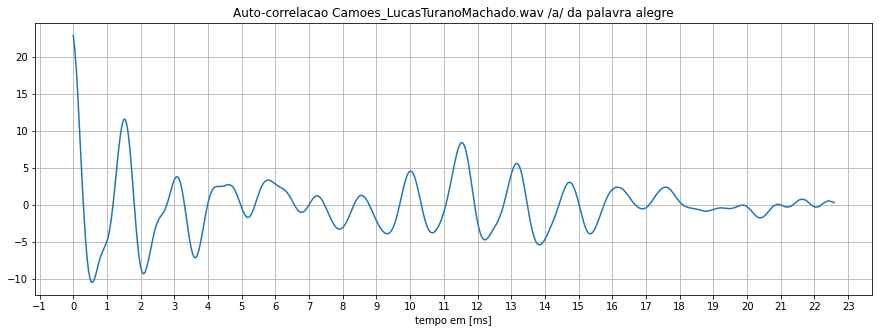

In [ ]:
# "a" da palavra "alegre"
auto_correlacao(ini, fim, audio4, "/a/ da palavra alegre")

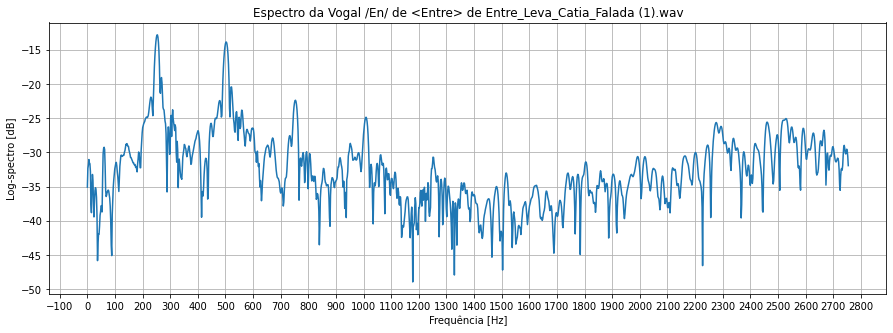

In [ ]:
# AUDIO DE "En" em v1En
f, Pxx_spec = signal.periodogram(v1En, fa, 'flattop', scaling='spectrum')
lf = len(f)
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal /En/ de <Entre> de '+audio1)
plt.grid(True)
plt.show()

In [ ]:
# Definindo funções
def formantes(v1A, sr1, audio_nome):
    f, Pxx_spec = signal.periodogram(v1A, sr1, 'flattop', scaling='spectrum')
    lf = len(f)
    fig, AX = plt.subplots(figsize=(15, 5))
    AX.xaxis.set_major_locator(MultipleLocator(100))
    AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Log-spectro [dB]')
    plt.title('Espectro da Vogal de '+audio_nome)
    plt.grid(True)
    #plt.show()

    #plt.savefig('4_'+audio_nome[:2] + ".png", bbox_inches='tight')

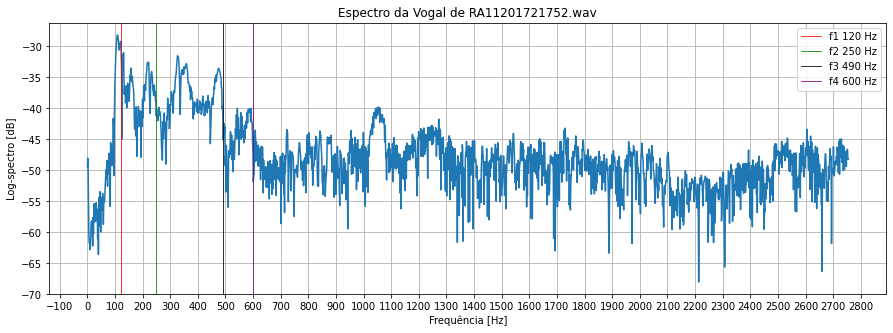

In [ ]:
#"Do" do número "Dois"
formantes(v2A, sr2, audio2)

plt.axvline(x=120, ymin=0, ymax=1, color="red"   , lw=0.8,label="f1 120 Hz")
plt.axvline(x=250, ymin=0, ymax=1, color="green" , lw=0.8,label="f2 250 Hz")
plt.axvline(x=490, ymin=0, ymax=1, color="black" , lw=0.8,label="f3 490 Hz")
plt.axvline(x=600, ymin=0, ymax=1, color="purple", lw=0.8,label="f4 600 Hz")
plt.legend()

plt.savefig('4_'+audio2[:2] + ".png", bbox_inches='tight')

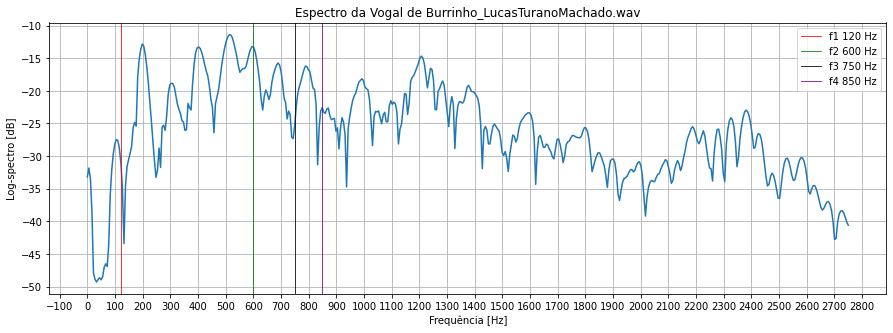

In [ ]:
# "ga" da palavra "folgado"
formantes(v3A, sr3, audio3)

plt.axvline(x=120, ymin=0, ymax=1, color="red"   , lw=0.8,label="f1 120 Hz")
plt.axvline(x=600, ymin=0, ymax=1, color="green" , lw=0.8,label="f2 600 Hz")
plt.axvline(x=750, ymin=0, ymax=1, color="black" , lw=0.8,label="f3 750 Hz")
plt.axvline(x=850, ymin=0, ymax=1, color="purple", lw=0.8,label="f4 850 Hz")
plt.legend()

plt.savefig('4_'+audio3[:2] + ".png", bbox_inches='tight')

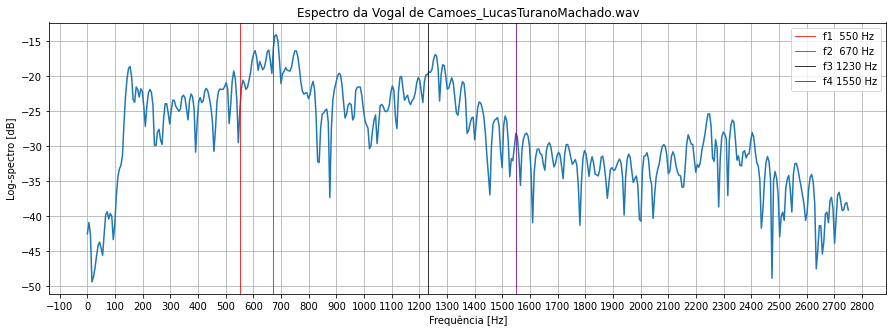

In [ ]:

# "a" da palavra "alegre"
formantes(v4A, sr4, audio4)

plt.axvline(x= 550, ymin=0, ymax=1, color="red"   , lw=0.8,label="f1  550 Hz")
plt.axvline(x= 670, ymin=0, ymax=1, color="green" , lw=0.8,label="f2  670 Hz")
plt.axvline(x=1230, ymin=0, ymax=1, color="black" , lw=0.8,label="f3 1230 Hz")
plt.axvline(x=1550, ymin=0, ymax=1, color="purple", lw=0.8,label="f4 1550 Hz")
plt.legend()

plt.savefig('4_'+audio4[:2] + ".png", bbox_inches='tight')

In [ ]:

print(audio4)
v4, sr4 = librosa.load(audio4)
IPython.display.Audio(data=v4, rate=sr4)

Camoes_LucasTuranoMachado.wav


<Figure size 1440x576 with 0 Axes>

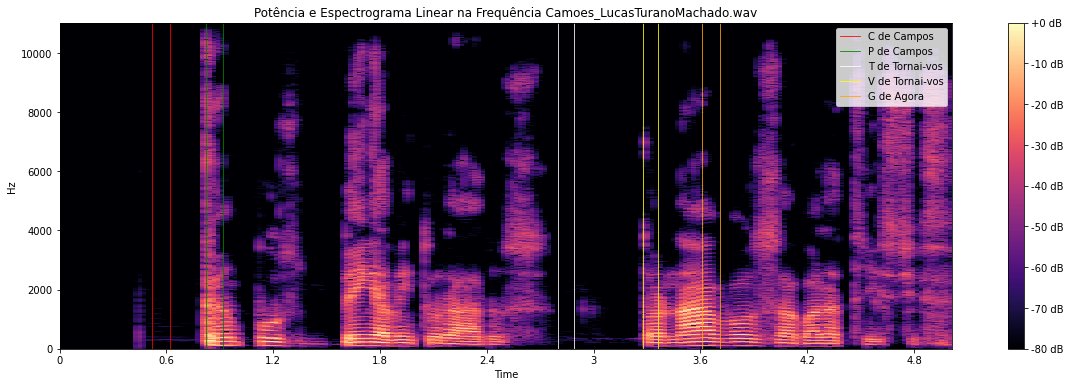

In [ ]:
# Selecionando os 5 primeiros segundos do audio Camões
v4, sr4 = librosa.load(audio4)
v4 = v4[:sr4*5]

# Plotando Espectrograma
plt.figure(figsize=(20, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v4)), ref=np.max)
fig, ax = plt.subplots(figsize=(20, 6))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência '+ audio4)

# Linhas nas regiões de consoantes
# "C de Campos"
plt.axvline(x=0.52, ymin=0, ymax=1, color="red", lw=0.8,label="C de Campos")
plt.axvline(x=0.62, ymin=0, ymax=1, color="red", lw=0.8)
# "P de Campos"
plt.axvline(x=0.82, ymin=0, ymax=1, color="green", lw=0.8, label="P de Campos")
plt.axvline(x=0.92, ymin=0, ymax=1, color="green", lw=0.8)
# "T de Tornai-vos"
plt.axvline(x=2.80, ymin=0, ymax=1, color="white", lw=0.8, label="T de Tornai-vos")
plt.axvline(x=2.89, ymin=0, ymax=1, color="white", lw=0.8)
# "V de Tornai-vos"
plt.axvline(x=3.28, ymin=0, ymax=1, color="yellow", lw=0.8, label="V de Tornai-vos")
plt.axvline(x=3.36, ymin=0, ymax=1, color="yellow", lw=0.8)
# "G de Agora"
plt.axvline(x=3.61, ymin=0, ymax=1, color="orange", lw=0.8, label="G de Agora")
plt.axvline(x=3.71, ymin=0, ymax=1, color="orange", lw=0.8)

plt.legend()

plt.savefig('5_'+audio4[:2] + ".png", bbox_inches='tight')